In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
rfr = pd.read_csv('whole_data_for_ML_BTC.csv')


In [3]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1504 non-null   int64  
 1   date              1504 non-null   object 
 2   market-price      1504 non-null   float64
 3   difficulty        1504 non-null   float64
 4   total-bitcoins    1504 non-null   float64
 5   blocks-size       1504 non-null   float64
 6   miners-revenue    1504 non-null   float64
 7   market-cap        1504 non-null   float64
 8   open              1504 non-null   float64
 9   high              1504 non-null   float64
 10  low               1504 non-null   float64
 11  close             1504 non-null   float64
 12  volume            1504 non-null   float64
 13  Number of Trades  1504 non-null   int64  
 14  TB Base Volume    1504 non-null   float64
 15  close_nextday     1504 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory

In [4]:
rfr.head()

,Unnamed: 0,date,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
0,0,2018-05-28,7344.56,4.306950e+12,17059112.5,170026.319757,1.454770e+07,1.251542e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29
1,1,2018-05-29,7106.06,4.306950e+12,17061337.5,170137.920977,1.283614e+07,1.215962e+11,7099.00,7540.00,7032.95,7461.29,39407.211830,237359,21855.930310,7375.96
2,2,2018-05-30,7457.02,4.306950e+12,17063550.0,170253.738107,1.651366e+07,1.274733e+11,7467.98,7569.00,7260.50,7375.96,32041.583623,242079,17205.948916,7485.01
3,3,2018-05-31,7386.72,4.306950e+12,17065775.0,170362.656132,1.630225e+07,1.289149e+11,7382.07,7699.00,7327.51,7485.01,30776.063102,274399,17009.013231,7521.01
4,4,2018-06-01,7489.66,4.306950e+12,17068000.0,170482.888342,1.564234e+07,1.255185e+11,7485.01,7608.55,7355.54,7521.01,28259.124078,303069,15701.205431,7640.03


In [5]:
rfr.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
rfr.set_index('date', inplace=True)

In [7]:
rfr.head()

,market-price,difficulty,total-bitcoins,blocks-size,miners-revenue,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,,
2018-05-28,7344.56,4.306950e+12,17059112.5,170026.319757,1.454770e+07,1.251542e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29
2018-05-29,7106.06,4.306950e+12,17061337.5,170137.920977,1.283614e+07,1.215962e+11,7099.00,7540.00,7032.95,7461.29,39407.211830,237359,21855.930310,7375.96
2018-05-30,7457.02,4.306950e+12,17063550.0,170253.738107,1.651366e+07,1.274733e+11,7467.98,7569.00,7260.50,7375.96,32041.583623,242079,17205.948916,7485.01
2018-05-31,7386.72,4.306950e+12,17065775.0,170362.656132,1.630225e+07,1.289149e+11,7382.07,7699.00,7327.51,7485.01,30776.063102,274399,17009.013231,7521.01
2018-06-01,7489.66,4.306950e+12,17068000.0,170482.888342,1.564234e+07,1.255185e+11,7485.01,7608.55,7355.54,7521.01,28259.124078,303069,15701.205431,7640.03


In [8]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504 entries, 2018-05-28 to 2023-05-25
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   market-price      1504 non-null   float64
 1   difficulty        1504 non-null   float64
 2   total-bitcoins    1504 non-null   float64
 3   blocks-size       1504 non-null   float64
 4   miners-revenue    1504 non-null   float64
 5   market-cap        1504 non-null   float64
 6   open              1504 non-null   float64
 7   high              1504 non-null   float64
 8   low               1504 non-null   float64
 9   close             1504 non-null   float64
 10  volume            1504 non-null   float64
 11  Number of Trades  1504 non-null   int64  
 12  TB Base Volume    1504 non-null   float64
 13  close_nextday     1504 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 176.2+ KB


In [9]:
# Subset dataset into X, y. X is features, y is target

X = rfr.drop(labels=['close_nextday'], axis=1) #FEATURES
y = rfr['close_nextday']   #TARGET 

print(X.head())

            market-price    difficulty  total-bitcoins    blocks-size  \
date                                                                    
2018-05-28       7344.56  4.306950e+12      17059112.5  170026.319757   
2018-05-29       7106.06  4.306950e+12      17061337.5  170137.920977   
2018-05-30       7457.02  4.306950e+12      17063550.0  170253.738107   
2018-05-31       7386.72  4.306950e+12      17065775.0  170362.656132   
2018-06-01       7489.66  4.306950e+12      17068000.0  170482.888342   

            miners-revenue    market-cap     open     high      low    close  \
date                                                                           
2018-05-28    1.454770e+07  1.251542e+11  7338.99  7437.00  7058.02  7099.00   
2018-05-29    1.283614e+07  1.215962e+11  7099.00  7540.00  7032.95  7461.29   
2018-05-30    1.651366e+07  1.274733e+11  7467.98  7569.00  7260.50  7375.96   
2018-05-31    1.630225e+07  1.289149e+11  7382.07  7699.00  7327.51  7485.01   
2018-06-

In [10]:
# Split X, y using TimeSeriesSplit() into X_train, X_test, y_train, y_test. First 75% is training, 25% is test
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3)  # n_splits = 3-1...2 splits

for train_index, test_index in tss.split(X):
    X_train_split, X_test_split = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train_split, y_test_split = y.iloc[train_index], y.iloc[test_index]

In [11]:
# Check train, test splits for correct date alignment and matching shape

print("X_train:\n", X_train_split, X_train_split.shape, "\n", '\nX_test:\n',
      X_test_split, X_test_split.shape)
print("\n")
print("y_train:\n", y_train_split, y_train_split.shape, "\n", '\ny_test:\n',
      y_test_split, y_test_split.shape)

X_train:
             market-price    difficulty  total-bitcoins    blocks-size  \
date                                                                    
2018-05-28       7344.56  4.306950e+12     17059112.50  170026.319757   
2018-05-29       7106.06  4.306950e+12     17061337.50  170137.920977   
2018-05-30       7457.02  4.306950e+12     17063550.00  170253.738107   
2018-05-31       7386.72  4.306950e+12     17065775.00  170362.656132   
2018-06-01       7489.66  4.306950e+12     17068000.00  170482.888342   
...                  ...           ...             ...            ...   
2022-02-18      40565.69  2.796715e+13     18961600.00  391449.795180   
2022-02-19      40014.55  2.796715e+13     18962706.25  391623.314563   
2022-02-20      40115.05  2.796715e+13     18963812.50  391780.055535   
2022-02-22      37031.08  2.796715e+13     18964918.75  392070.752423   
2022-02-23      38262.17  2.796715e+13     18966037.50  392237.363188   

            miners-revenue    market-cap

In [12]:
# Reshape y train, test to match X train, test

y_train = y_train_split.values.reshape(-1, 1)
y_test = y_test_split.values.reshape(-1, 1)

print(y_train)

[[ 7461.29]
 [ 7375.96]
 [ 7485.01]
 ...
 [38230.33]
 [37250.01]
 [38327.21]]


In [13]:
# # Scale X_train, X_test, y_train, y_test to prevent overfitting and minimize outliers like large values
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# X_train = ss.fit_transform(X_train_split)
# # X_test = ss.fit_transform(X_test_split)
# y_train = ss.fit_transform(y_train)
# y_test = ss.fit_transform(y_test)

In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train_split)
X_test = ss.transform(X_test_split)
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)


In [15]:
# Make sure shape is same before scaling.

print("X Train:", type(X_train), X_train.shape, len(X_train))
print("\nX Test:", type(X_test), X_test.shape, len(X_test))
print("\ny Train:", type(y_train), y_train.shape, len(y_train))
print("\ny Test:", type(y_test), y_test.shape, len(y_test))

X Train: <class 'numpy.ndarray'> (1128, 13) 1128

X Test: <class 'numpy.ndarray'> (376, 13) 376

y Train: <class 'numpy.ndarray'> (1128, 1) 1128

y Test: <class 'numpy.ndarray'> (376, 1) 376


In [16]:
# # Test function to run prediction error metrics from model pipline

# def test(models, iterations=100):
#     results = {}
#     for i in models:
#         r2_test = []
#         r2_train = []
#         MAE_test = []
#         MAE_train = []
#         MSE_test = []
#         MSE_train = []
#         MAPE_test = []
#         MAPE_train = []
#         for j in range(iterations):
#             r2_test.append(
#                 metrics.r2_score(
#                     y_test, models[i].fit(X_train, y_train).predict(X_test)))
#             r2_train.append(
#                 metrics.r2_score(
#                     y_train, models[i].fit(X_train, y_train).predict(X_train)))
#             MAE_test.append(
#                 metrics.mean_absolute_error(
#                     y_test, models[i].fit(X_train, y_train).predict(X_test)))
#             MAE_train.append(
#                 metrics.mean_absolute_error(
#                     y_train, models[i].fit(X_train, y_train).predict(X_train)))
#             MSE_test.append(
#                 metrics.mean_squared_error(
#                     y_test, models[i].fit(X_train, y_train).predict(X_test)))
#             MSE_train.append(
#                 metrics.mean_squared_error(
#                     y_train, models[i].fit(X_train, y_train).predict(X_train)))
#             MAPE_test.append(
#                 metrics.mean_absolute_percentage_error(
#                     y_test, models[i].fit(X_train, y_train).predict(X_test)))
#             MAPE_train.append(
#                 metrics.mean_absolute_percentage_error(
#                     y_train, models[i].fit(X_train, y_train).predict(X_train)))

#         results[i] = [
#             np.mean(r2_train),
#             np.mean(r2_test),
#             np.mean(MAE_train),
#             np.mean(MAE_test),
#             np.mean(MSE_train),
#             np.mean(MSE_test),
#             np.mean(MAPE_train),
#             np.mean(MAPE_test)
#         ]

#     return pd.DataFrame(results)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

rfr_params = {
    "n_estimators": [100, 200, 300, 400, 500],
    'max_depth': range(10, 20),  # Reduce the range of max_depth
    "max_features": ["auto"],
    "bootstrap": [True, False]
}


ols_pipe = Pipeline([('poly', PolynomialFeatures()),
                     ('fit', LinearRegression())])
lasso_pipe = Pipeline([('poly', PolynomialFeatures()),
                       ('fit', Lasso())])
ridge_pipe = Pipeline([('poly', PolynomialFeatures()),
                       ('fit', Ridge())])


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Ridge

model = {
    'RFR':
    GridSearchCV(RandomForestRegressor(oob_score=True),
                 param_grid=rfr_params).fit(X_train, y_train).best_estimator_,
}


/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

In [19]:
feature_importances = model['RFR'].feature_importances_
important_features_indices = np.argsort(feature_importances)[::-1][:7]  # Select top k features
X_train_selected = X_train[:, important_features_indices]
X_test_selected = X_test[:, important_features_indices]

In [20]:
pred_rfr = model['RFR'].fit(X_train, y_train).predict(X_test)


/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_13211/519672745.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred_rfr = model['RFR'].fit(X_train, y_train).predict(X_test)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [21]:
# # Model performance comparision between train and test
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# from sklearn import metrics

# scores = test(model)
# scores = scores.T
# scores.columns = [
#     'R^2 Test', 'R^2 Train', 'MAE Test', 'MAE Train', 'MSE Test', 'MSE Train',
#     'MAPE Test', 'MAPE Train'

# scores['RMSE Train'] = scores['MSE Train']**2
# scores['RMSE Test'] = scores['MSE Test']**2
# scores['OOB Train'] = model['RFR'].fit(X_train, y_train).oob_score_



In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn import metrics

model['RFR'].fit(X_train, y_train)  # Fit the Random Forest model

# Perform cross-validation
scores = cross_val_score(model['RFR'], X_train, y_train, cv=5)

print("Cross-validated R^2 scores:", scores)

# Model performance comparison between train and test
pred_train = model['RFR'].predict(X_train)
pred_test = model['RFR'].predict(X_test)

scores = pd.DataFrame(index=['R^2', 'MAE', 'MSE', 'MAPE', 'RMSE'], columns=['Train', 'Test'])
scores['Train']['R^2'] = r2_score(y_train, pred_train)
scores['Test']['R^2'] = r2_score(y_test, pred_test)
scores['Train']['MAE'] = mean_absolute_error(y_train, pred_train)
scores['Test']['MAE'] = mean_absolute_error(y_test, pred_test)
scores['Train']['MSE'] = mean_squared_error(y_train, pred_train)
scores['Test']['MSE'] = mean_squared_error(y_test, pred_test)
scores['Train']['MAPE'] = mean_absolute_percentage_error(y_train, pred_train)
scores['Test']['MAPE'] = mean_absolute_percentage_error(y_test, pred_test)
scores['Train']['RMSE'] = np.sqrt(scores['Train']['MSE'])
scores['Test']['RMSE'] = np.sqrt(scores['Test']['MSE'])

# OOB Score
scores['Train']['OOB'] = model['RFR'].oob_score_



/var/folders/q7/1k7jcrmx4rv8bqn_fgk78smm0000gn/T/ipykernel_13211/2286535041.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model['RFR'].fit(X_train, y_train)  # Fit the Random Forest model
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha

Cross-validated R^2 scores: [0.94399473 0.95328276 0.92647149 0.96391626 0.92225462]


In [23]:
print("Model performance:\n", scores)


Model performance:
          Train      Test
R^2   0.999344  0.792995
MAE   0.013738  0.176547
MSE   0.000656  0.037539
MAPE  0.017594  4.829378
RMSE  0.025608  0.193751


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model['RFR'], X_train, y_train, cv=5)  # Perform 5-fold cross-validation
print("Cross-validated R^2 scores:", scores)


/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/natalieqoursha/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/natalieqour

Cross-validated R^2 scores: [0.94865109 0.95327903 0.93168399 0.96431646 0.92654793]


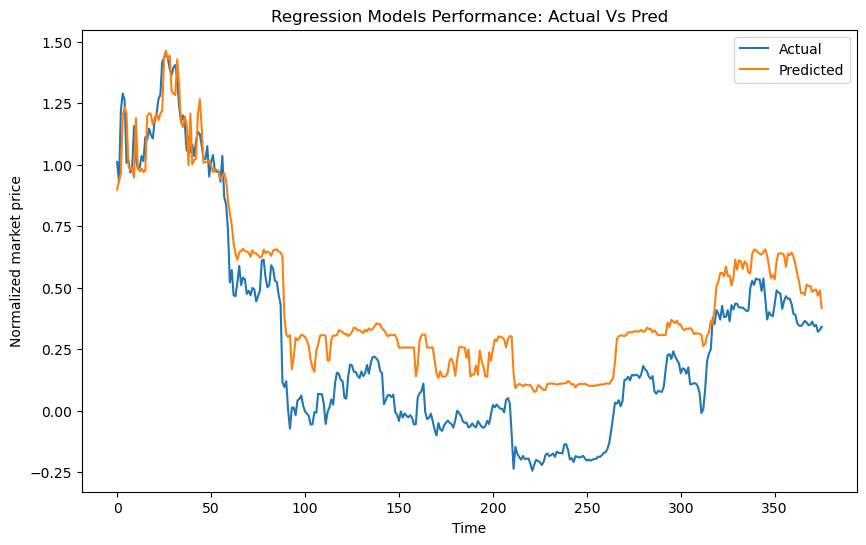

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(pred_rfr, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.title('Regression Models Performance: Actual Vs Pred')
plt.show()


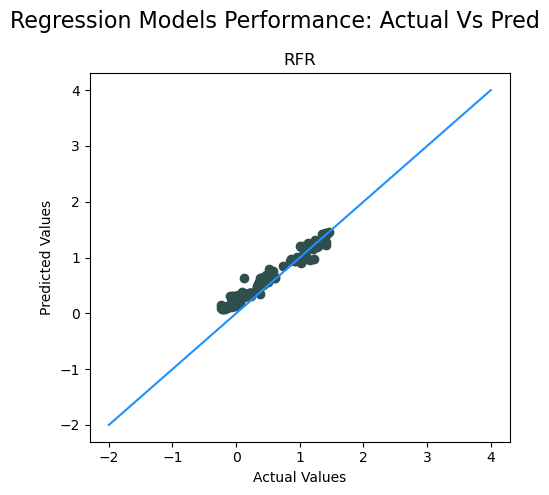

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Regression Models Performance: Actual Vs Pred', fontsize=16)

colors = ['darkslategrey']

axs.scatter(y_test, pred_rfr, c=colors)
axs.plot([-2, 4], [-2, 4], color='dodgerblue')
axs.set_title("RFR")
axs.set_xlabel('Actual Values')
axs.set_ylabel('Predicted Values')

fig.tight_layout()
plt.show()